# HW3 Problem 1 (15 points): Linear Regression [TA: Vodelina Samatova]

In this exercise, you will apply linear regression and Lasso regression methods to the dataset supplied to you and then compare their results to determine whether Lasso regression is needed for this dataset. Additionally, you will use sklearn's pipeline framework, which is so helpful when you have a sequence of transforms (e.g. normalization) and estimators (e.g. classifiers or regressors).

**Note**: This assignment will have less provided code - you have to write most of it yourself. Remember to use prior homeworks as examples, and **always use the suggested random seed** to ensure the test cases work as provided.

**Dataset description**: You are provided a dataset with 20 variables. Variables $x1\ -\ x19$ refer to the independent variables, while variable $y$ is your dependent variable. Training data is stored in the file `./regression-train.csv`.

**Note on Test Cases**: TAs will use a test set to verify your solution. The format (independent variables $x1\ -\ x19$, dependent variable  $y$) will be same, but TAs' file may contain different number of data points than the split version from training set. Please ensure you take this into account, and do not hard code any dimensions.


In [1]:
import warnings
warnings.filterwarnings('ignore')

## Part 0: Add necessary imports

As you work through the homework, don't forget to add imports.
We often put imports at the top of the file.
For this assignment, you'll likely want to import pandas and numpy.

In [2]:
#Import necessary library
import pandas as pd
import numpy as np

## Part 1: Linear Regression and Lasso Regression

You will write code to normalize and train simple linear regression and Lasso Regression using scikit-learn.

### 1.1 Loading Dataset

Load a dataset into pandas data frame `df` from this file: `./regression-train.csv`, assign columns $x1\ -\ x19$ to a variable `X`, and assign column $y$ to a variable `y`.

In [3]:
#TODO: Read the data

df = pd.read_csv('/content/regression-train.csv')
X = df.iloc[:, 0:19]
y = df['y']

#TODO: Output the data
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,508,44,60,718,42,234,0,0,56,52,8,216,0,1998,472,136,236,12,4,610.0
1,1020,106,198,1620,126,680,2,2,112,104,36,614,0,5744,1642,294,348,14,20,2300.0
2,1118,146,828,704,32,698,2,2,96,122,18,842,0,6324,1748,282,718,16,4,1850.0
3,922,70,452,222,48,150,0,0,108,108,22,152,2,1360,320,224,98,4,36,270.0
4,526,60,294,162,18,164,2,2,52,46,8,166,0,1776,440,140,172,8,2,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,630,50,78,996,48,188,2,2,70,120,26,136,0,1260,302,152,110,6,26,310.0
128,330,32,38,664,4,20,0,2,26,18,4,36,2,392,88,78,36,6,4,150.0
129,1146,156,262,2628,194,840,0,0,170,120,24,940,0,6396,1714,288,664,16,18,1920.0
130,472,22,398,250,2,128,0,0,54,30,26,232,2,2230,540,112,114,8,0,460.0


In [4]:
import numpy as np
np.testing.assert_equal(df.shape, (132,20))

In [5]:
# Note: we will run hidden test cases too


### 1.2 Train/Test Split

Create a 80% train / 20% test split, using **0** as the random state.

In [6]:
from sklearn.model_selection import train_test_split

#TODO
# Create an 80% train and 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the resulting datasets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (105, 19)
X_test shape: (27, 19)
y_train shape: (105,)
y_test shape: (27,)


In [7]:
np.testing.assert_equal(X_train.shape, (105,19))
np.testing.assert_equal(X_test.shape, (27,19))

In [8]:
# Note: we will run hidden test cases too


### 1.3 Linear Regression v.s. Lasso CV

In this section you will compare a LinearRegression with standard hyperparameters to a LassoCV model.

Before your begin, read the documentation on sklearn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) - a Lasso regression model that uses CV to tune its hyperparameters.

**Note** that the lasso regression model has *built-in* crossvalidation, which it performs on the training dataset provided, to select the best shrinkage coefficient for the validation data.

For regression, it is particularly important to normalize our data before training the model (ensuring all variables are on the same scale), so we can better interpret our coefficients. For both models, make sure data is scaled first using **a standard scaler**, fit to the training data. Hint: you can use the sklearn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to achieve this.

Note that we could use a pipeline for this process, but to make things easier, we will instead normalize our `X_train` and `X_test` variables.

Complete the following:
1. Fit a StandardScaler to the training dataset, and the normalize the training and test datasets. (**Note**: we fit the scale only to the training dataset - just like our model - we cannot use the test dataset to fit any part of our pipeline).
2. Create both a LinearRegression model, and a LassoCV that uses **10 folds** for cross-validation and has a random state of **0**.
3. Then fit both models to the normalized training dataset.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

# Create and fit StandardScaler to the training dataset
scaler = StandardScaler()
scaler.fit(X_train)

# Normalize the training and test datasets
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create LinearRegression model
linear_regressor = LinearRegression()

# Create LassoCV model with 10 folds and random state 0
Lasso_regressor = LassoCV(cv=10, random_state=0)

# Fit both models to the normalized training dataset
linear_regressor.fit(X_train_normalized, y_train)
Lasso_regressor.fit(X_train_normalized, y_train)


LassoCV(cv=10, random_state=0)

In [29]:
# Test that the training dataset has been normalized
# Go through each attribute
for i in range(X_train.shape[1]):
    # Assert that the mean is near 0 and the standard deviation is near 1
    # Use .iloc for integer-based indexing
    np.testing.assert_almost_equal(np.mean(X_train.iloc[:, i]), 0)
    np.testing.assert_almost_equal(np.std(X_train.iloc[:, i]), 1)

np.testing.assert_almost_equal(scaler.n_features_in_, 19)
np.testing.assert_almost_equal(linear_regressor.n_features_in_, 19)
np.testing.assert_almost_equal(Lasso_regressor.n_features_in_, 19)

In [28]:
# Test that the training dataset has been normalized
# Go through each attribute
for i in range(X_train.shape[1]):
    # Assert that the mean is near 0 and the standard deviation is near 1
    np.testing.assert_almost_equal(np.mean(X_train[:,i]), 0)
    np.testing.assert_almost_equal(np.std(X_train[:,i]), 1)

np.testing.assert_almost_equal(scaler.n_features_in_, 19)
np.testing.assert_almost_equal(linear_regressor.n_features_in_, 19)
np.testing.assert_almost_equal(Lasso_regressor.n_features_in_, 19)

InvalidIndexError: (slice(None, None, None), 0)

In [30]:
# Note: we will run hidden test cases too


### 1.5 Inference and Evaluation
Calculate the training and testing RMSE for both models and assign them to the corresponding variables.

Which model do you expect will have lower training error? What about testing error? Why?

Training Error:

Linear Regression: The Linear Regression model is expected to have a lower training error compared to LassoCV. This is because Linear Regression fits the data as closely as possible without any regularization, allowing it to potentially capture all the nuances of the training data.
LassoCV: LassoCV applies L1 regularization, which penalizes the absolute size of the coefficients. This can lead to some coefficients being shrunk to zero, effectively performing feature selection. As a result, while it may not fit the training data as closely as Linear Regression, it can still achieve a low training error.
Testing Error:

Linear Regression: The testing error for Linear Regression might be higher compared to LassoCV. Since Linear Regression has no regularization, it can overfit the training data, capturing noise and specific patterns that do not generalize well to unseen data.
LassoCV: LassoCV is designed to prevent overfitting through regularization. By tuning the shrinkage parameter using cross-validation, it balances fitting the training data and maintaining generalizability to the test data. Therefore, it is expected to have a lower testing error compared to Linear Regression.

In [31]:
# Note: You can use this function to calcualte rmse when true value and prediction values are known.
import math
import sklearn
def calculate_rmse(y_true, y_pred):
    return math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))

#TODO
# Predictions for Linear Regression
y_train_pred_LR = linear_regressor.predict(X_train_scaled)
y_test_pred_LR = linear_regressor.predict(X_test_scaled)

# Predictions for LassoCV
y_train_pred_Lasso = Lasso_regressor.predict(X_train_scaled)
y_test_pred_Lasso = Lasso_regressor.predict(X_test_scaled)

# Calculate RMSE for Linear Regression
LR_training_RMSE = calculate_rmse(y_train, y_train_pred_LR)
LR_testing_RMSE = calculate_rmse(y_test, y_test_pred_LR)

# Calculate RMSE for LassoCV
Lasso_training_RMSE = calculate_rmse(y_train, y_train_pred_Lasso)
Lasso_testing_RMSE = calculate_rmse(y_test, y_test_pred_Lasso)


print(f"Linear: Training RMSE = {LR_training_RMSE}; Testing RMSE = {LR_testing_RMSE}\nLasso:  Training RMSE = {Lasso_training_RMSE}; Testing RMSE = {Lasso_testing_RMSE}")

Linear: Training RMSE = 524.953283852617; Testing RMSE = 787.9099436300606
Lasso:  Training RMSE = 541.6957360523041; Testing RMSE = 639.4484997672938


In [32]:
np.testing.assert_almost_equal(LR_training_RMSE, 524.9532838526169)
np.testing.assert_almost_equal(Lasso_training_RMSE, 541.6957360523041)

In [33]:
# Note: we will run hidden test cases too


Review your prediction above. Were you correct?

Training RMSE:

Linear Regression (524.95) has a lower training RMSE compared to LassoCV (541.70).
This aligns with the initial expectation that Linear Regression would fit the training data more closely due to the lack of regularization.
Testing RMSE:

LassoCV (639.45) has a lower testing RMSE compared to Linear Regression (787.91).
This supports the expectation that LassoCV would generalize better to unseen data due to its regularization, which helps prevent overfitting.

## Part 2 Parameters of Estimators

You can access the parameters specific to the estimators. If you have been using pipeline, please find the documentation on [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html).

### 2.1 Parameters

Save the parameters of the models to corresponding variables using `.coef_` attribute of each of the model

In [34]:
#TODO
LR_parameter = linear_regressor.coef_
Lasso_parameter = Lasso_regressor.coef_

print("Linear Regression parameters:")
print(LR_parameter)
print("\nLasso Regression parameters:")
print(Lasso_parameter)

Linear Regression parameters:
[   48.18082989    65.73979512   210.77335056   122.5616241
   124.07603501   290.38608009   123.86744484   -83.03161175
   270.17717717   -48.56806094   -23.51778917  -941.63419412
   -89.00842661 -4044.98292672  5073.44151699  -544.21209605
   137.73175811  -101.04154575   235.26578305]

Lasso Regression parameters:
[ -201.29823887   125.69640945   143.15397394   113.55339266
     0.           452.14702148    78.0967967    -28.89070358
    -0.            -8.62418868     0.           -92.58796998
   -95.66296382 -2130.41737003  2429.16734481    -0.
    -0.          -153.90630771   171.8676209 ]


In [35]:
np.testing.assert_almost_equal(LR_parameter[10], -23.517789172238473)
np.testing.assert_almost_equal(Lasso_parameter[10], 0.0)

In [36]:
# Note: we will run hidden test cases too


From the results, compare the two regression models, including the training and testing RMSE, and the coefficients. Use the output of these functions to answer the following questions below:

1. The dataset contains 19 attributes. Are all 19 attributes useful for predicting the dependent variable? Why or why not? Use your results to justify the answer.
2. If not all attributes are predictive, use your Lasso model to perform feature selection. Which attributes should be kept? Use a correlation and/or scatter plot to justify your answer for at least one attribute (in a new cell below).

Training and Testing RMSE:

Linear Regression:
Training RMSE: 524.95
Testing RMSE: 787.91
Lasso Regression:
Training RMSE: 541.70
Testing RMSE: 639.45
Analysis:

Linear Regression has a lower training RMSE, indicating that it fits the training data better. However, its higher testing RMSE suggests that it may be overfitting the training data, leading to poorer performance on unseen data.
Lasso Regression, while having a slightly higher training RMSE, outperforms Linear Regression on the testing set, indicating better generalization due to regularization.
Coefficients:

Linear Regression Coefficients: These coefficients will show the contribution of each of the 19 attributes to the prediction of the dependent variable.
Lasso Regression Coefficients: The Lasso model may have some coefficients that are exactly zero, indicating that those attributes are not important for predicting the dependent variable due to the regularization effect.

Justification:

If the Lasso Regression shows that some coefficients are zero, it implies that those attributes are not useful for predicting the dependent variable. This is a key feature of Lasso Regression, which performs implicit feature selection by penalizing the coefficients of less important features.
If the Linear Regression model shows significant coefficients for all attributes but the Lasso model does not, it suggests that not all attributes contribute meaningfully to the prediction. The presence of non-zero coefficients in Lasso indicates that those attributes should be retained.

In [40]:
import numpy as np

# Identify attributes to keep based on non-zero coefficients
non_zero_indices = np.where(Lasso_parameter != 0)[0]
important_attributes = X.columns[non_zero_indices].tolist()  # Assuming X is the DataFrame of features

print("Attributes to keep based on Lasso model:")
print(important_attributes)

Attributes to keep based on Lasso model:
['x1', 'x2', 'x3', 'x4', 'x6', 'x7', 'x8', 'x10', 'x12', 'x13', 'x14', 'x15', 'x18', 'x19']


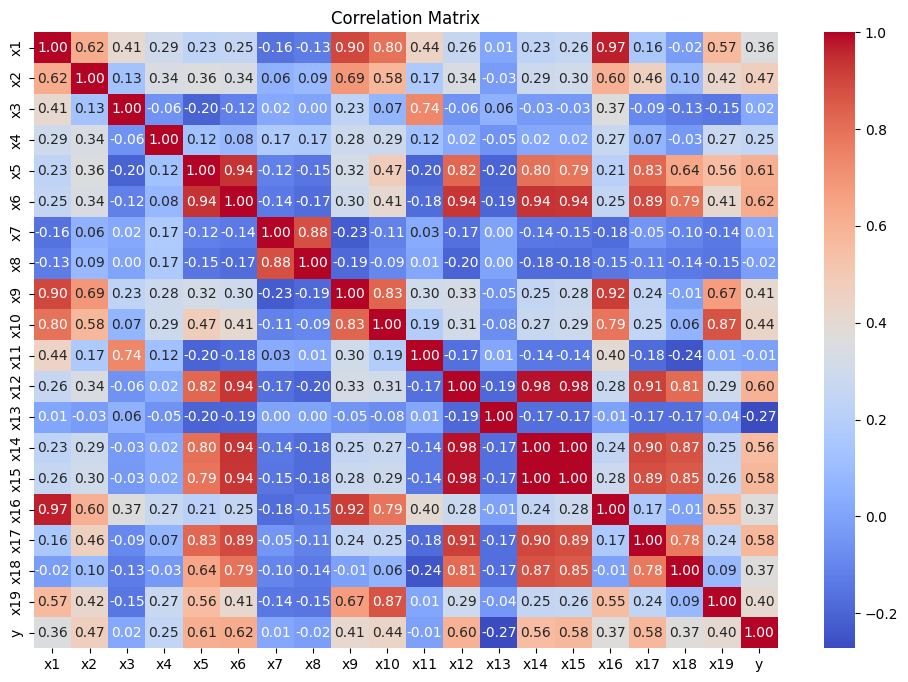

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the features and target variable
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
